<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/temperature_humidity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              0           1           2          3
0   25.8.2024,    2:21:37,    55.00 %,    27.60 °C
1   25.8.2024,    2:23:30,    55.00 %,    27.60 °C
2   25.8.2024,    2:22:14,    55.00 %,    27.60 °C
3   25.8.2024,    2:22:53,    55.00 %,    27.50 °C
4   25.8.2024,     2:23:0,    55.00 %,    27.50 °C


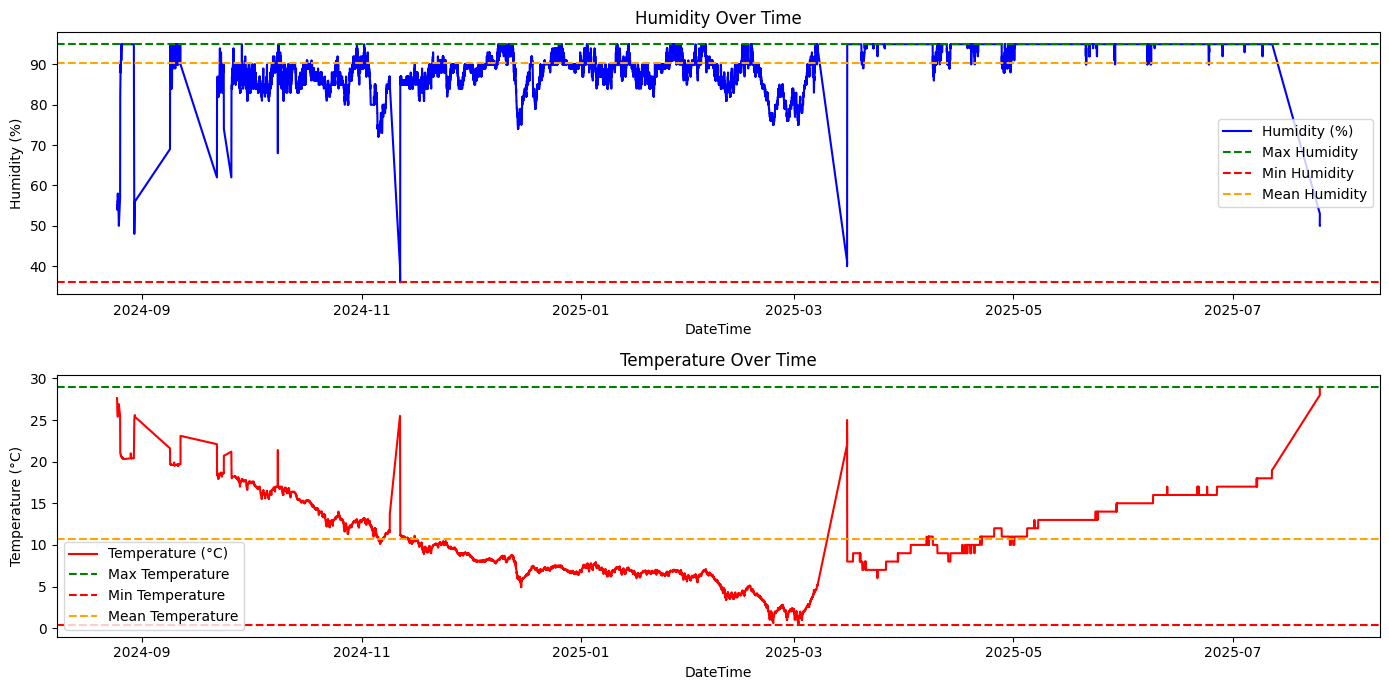

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла
df = pd.read_csv('DATA.TXT', sep='n', header=None)

# Исправленное регулярное выражение для извлечения данных
data = df[0].str.extract(r'Date:s*(.+?)s*Time:s*(.+?)s*Humidity:s*(.+?)s*Temperature:s*(.+)')

# Проверка результата извлечения
print(data.head())

# Переименование колонок
data.columns = ['Date', 'Time', 'Humidity', 'Temperature']

# Объединение даты и времени в один столбец
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], dayfirst=True)

# Преобразование Humidity и Temperature в числовые значения
data['Humidity'] = data['Humidity'].str.replace(' %, ', '').astype(float)
data['Temperature'] = data['Temperature'].str.replace(' °C', '').astype(float)

# Установка DateTime как индекса
data.set_index('DateTime', inplace=True)

# Вычисление максимальных, минимальных и средних значений
humidity_max = data['Humidity'].max()
humidity_min = data['Humidity'].min()
humidity_mean = data['Humidity'].mean()

temperature_max = data['Temperature'].max()
temperature_min = data['Temperature'].min()
temperature_mean = data['Temperature'].mean()

# Построение графиков
plt.figure(figsize=(14, 7))

# График влажности
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Humidity'], color='blue', label='Humidity (%)')
plt.axhline(humidity_max, color='green', linestyle='--', label='Max Humidity')
plt.axhline(humidity_min, color='red', linestyle='--', label='Min Humidity')
plt.axhline(humidity_mean, color='orange', linestyle='--', label='Mean Humidity')
plt.title('Humidity Over Time')
plt.xlabel('DateTime')
plt.ylabel('Humidity (%)')
plt.legend()

# График температуры
plt.subplot(2, 1, 2)
plt.plot(data.index, data['Temperature'], color='red', label='Temperature (°C)')
plt.axhline(temperature_max, color='green', linestyle='--', label='Max Temperature')
plt.axhline(temperature_min, color='red', linestyle='--', label='Min Temperature')
plt.axhline(temperature_mean, color='orange', linestyle='--', label='Mean Temperature')
plt.title('Temperature Over Time')
plt.xlabel('DateTime')
plt.ylabel('Temperature (°C)')
plt.legend()

# Показать графики
plt.tight_layout()
plt.show()
